In [1]:
from src.spatial_models import *
import src.simulation as simulation
import src.visualization as visualization
import src.analysis as analysis


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.8.0
 Built: Aug 27 2024 04:38:39

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.


Feb 16 19:03:00 SimulationManager::set_status [Info]: 
    Temporal resolution changed from 0.1 to 0.1 ms.

Feb 16 19:03:00 SimulationManager::set_status [Info]: 
    Temporal resolution changed from 0.1 to 0.1 ms.


Number of mossy -> granule connections: 54646
Number of mossy -> golgi connections: 1102
Number of mossy -> DCN connections: 9217
Number of granule -> golgi connections: 147994
Number of granule -> purkinje connections: 951633
Number of granule -> interneuron connections: 1270323
Number of golgi -> granule connections: 166318
Number of golgi -> golgi connections: 848
Number of climbing -> purkinje connections: 256
Number of interneuron -> purkinje connections: 1514
Number of interneuron -> interneuron connections: 28334
Number of purkinje -> DCN connections: 1280
Network setup complete.


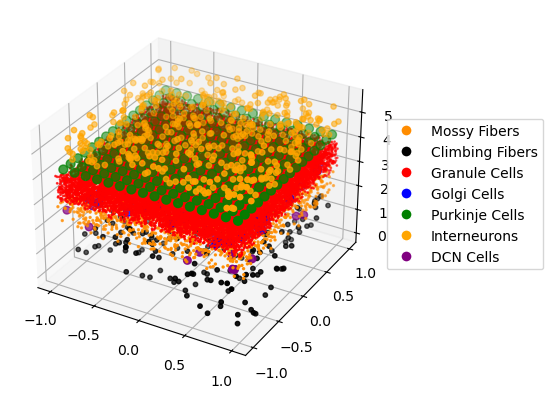

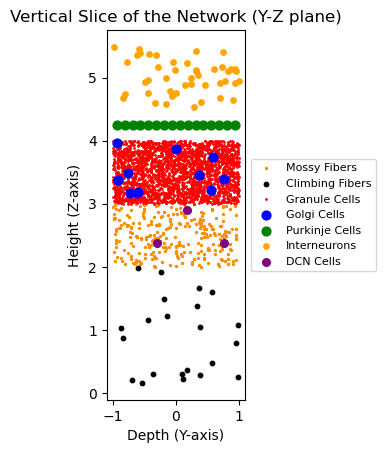


Feb 16 19:08:12 ConnectionManager [Warning]: 
    New connections created, connection descriptors previously obtained using 
    'GetConnections' are now invalid.
Simulation running...

Feb 16 19:08:12 NodeManager::prepare_nodes [Info]: 
    Preparing 28618 nodes for simulation.

Feb 16 19:08:12 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 28618
    Simulation time (ms): 1000
    Number of OpenMP threads: 1
    Not using MPI

Feb 16 19:08:35 SimulationManager::run [Info]: 
    Simulation finished.


In [2]:
spatial_results = simulation.example_spatial_simulation()

# ~ 5 minutes 30 seconds

In [6]:
results = simulation.example_simulation()

Created 25000 granule cells.
Created 256 Purkinje cells.
Created 450 interneurons.
Created 100 Golgi cells.
Created 50 deep cerebellar nuclei cells.
Created 2500 mossy fibers.
Created 256 climbing fibers.
Number of mossy -> granule connections: 625538
Number of mossy -> golgi connections: 4979
Number of mossy -> DCN connections: 125000
Number of granule -> golgi connections: 375449
Number of granule -> purkinje connections: 4481646
Number of granule -> interneuron connections: 3375719
Number of golgi -> granule connections: 250432
Number of golgi -> golgi connections: 2018
Number of climbing -> purkinje connections: 256
Number of interneuron -> purkinje connections: 22995
Number of interneuron -> interneuron connections: 81042
Number of purkinje -> DCN connections: 1280
Network setup complete.
Simulation running...

Feb 16 19:22:40 ConnectionManager [Warning]: 
    New connections created, connection descriptors previously obtained using 
    'GetConnections' are now invalid.

Feb 16 1

In [3]:
## Analyze spatial results

PC_spatial_spike_data = spatial_results["purkinje_spikes"]
PC_spatial_voltage_data = spatial_results["purkinje_voltages"]
GrC_spatial_spike_data = spatial_results["granule_spikes"]
GrC_spatial_voltage_data = spatial_results["granule_voltages"]
GoC_spatial_spike_data = spatial_results["golgi_spikes"]
GoC_spatial_voltage_data = spatial_results["golgi_voltages"]

PC_isis = analysis.get_isi_distribution(PC_spatial_spike_data["times"])
GrC_isis = analysis.get_isi_distribution(GrC_spatial_spike_data["times"])
GoC_isis = analysis.get_isi_distribution(GoC_spatial_spike_data["times"])

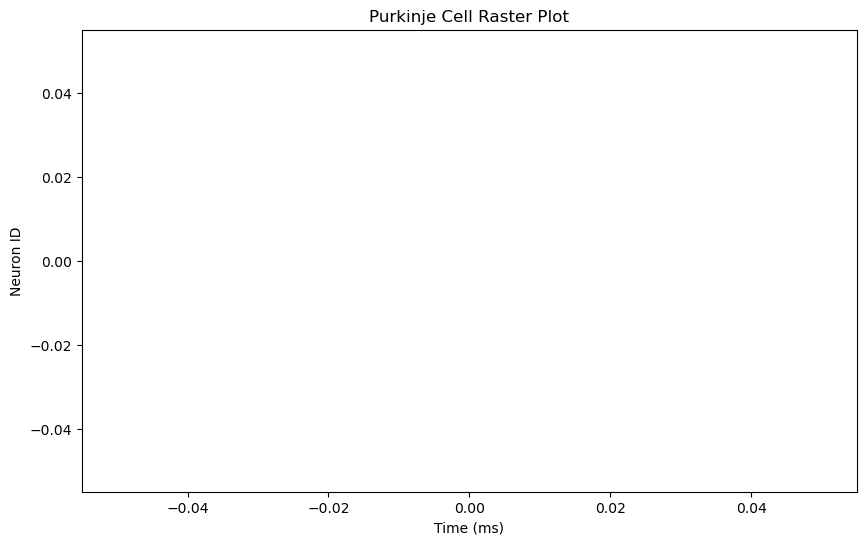

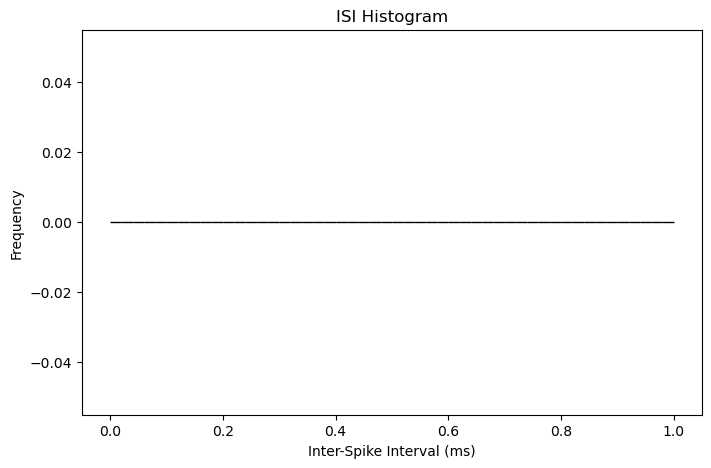

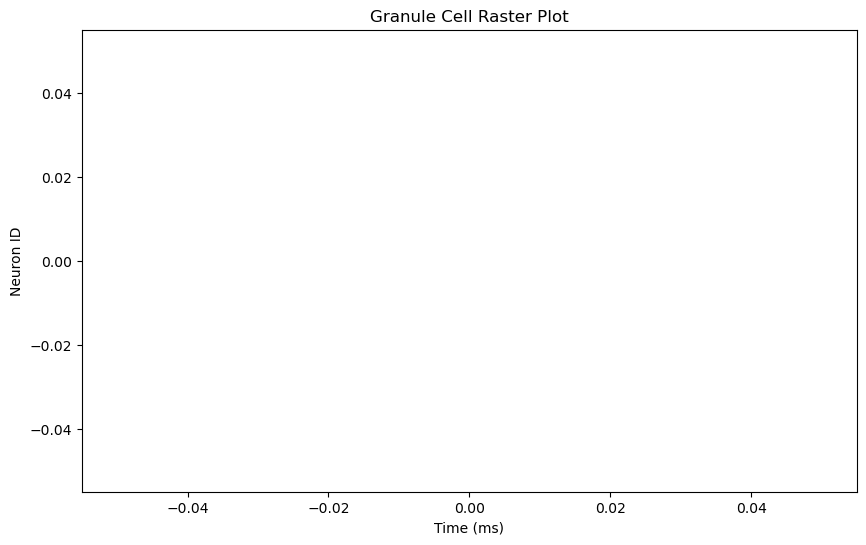

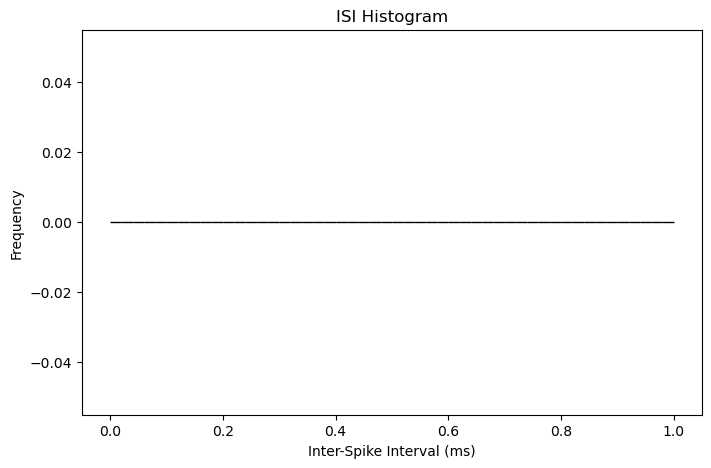

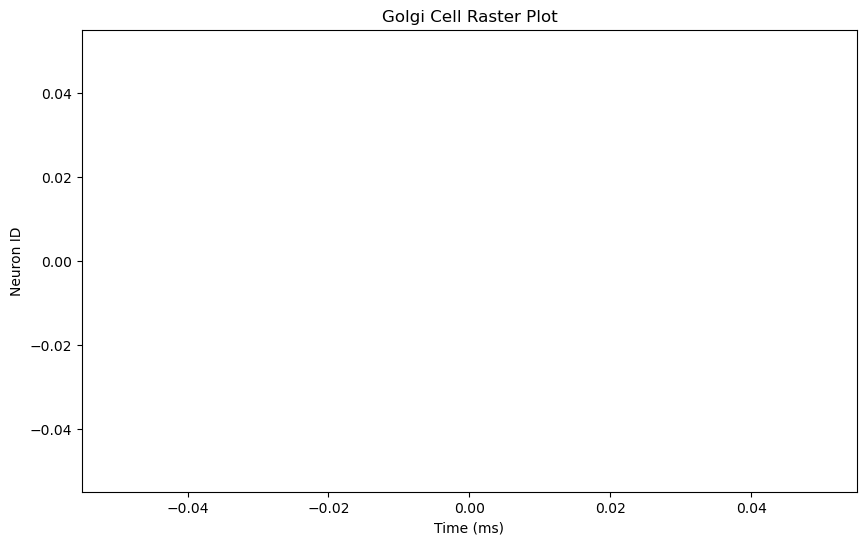

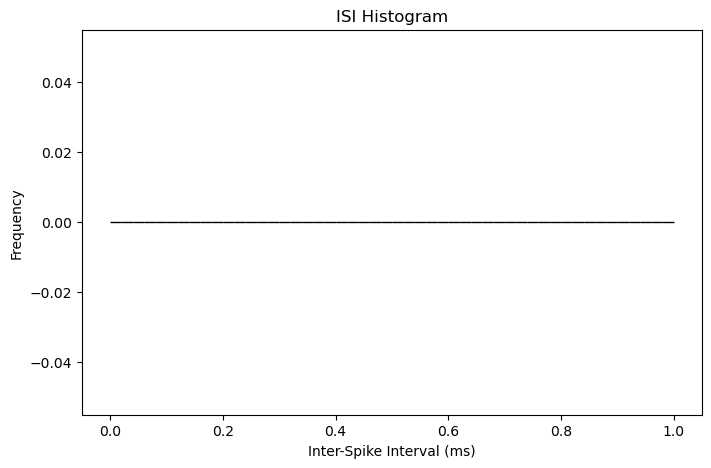

In [4]:
visualization.plot_raster(PC_spatial_spike_data, title="Purkinje Cell Raster Plot")
visualization.plot_isi_histogram(PC_isis)
visualization.plot_raster(GrC_spatial_spike_data, title="Granule Cell Raster Plot")
visualization.plot_isi_histogram(GrC_isis)
visualization.plot_raster(GoC_spatial_spike_data, title="Golgi Cell Raster Plot")
visualization.plot_isi_histogram(GoC_isis)

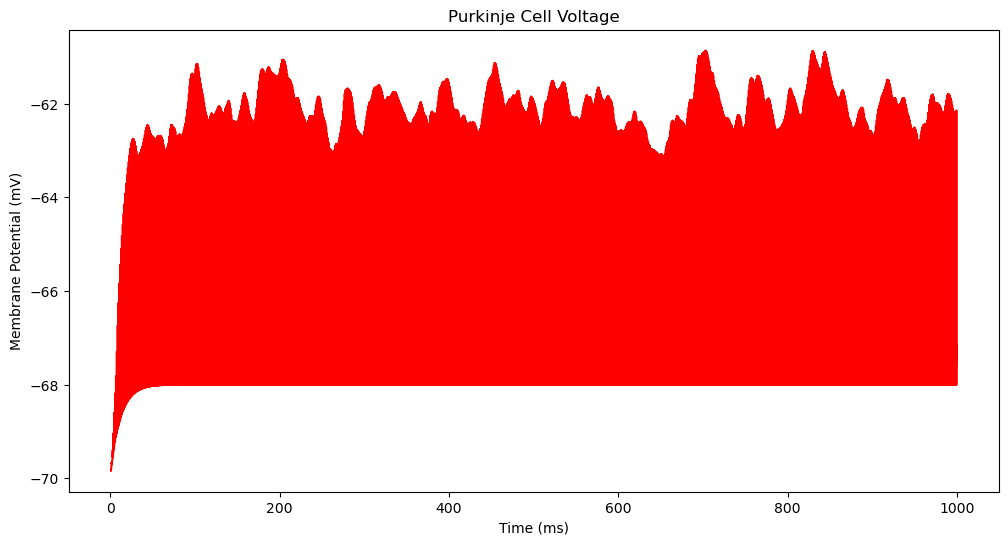

In [5]:
visualization.plot_voltage_trace(GrC_spatial_voltage_data, title="Purkinje Cell Voltage")

In [2]:
nest.ResetKernel()
mf = create_spatial_mossy_fibers(1000)
GrC = create_spatial_granule_cells(1000)
connect_spatial_mossy_to_granule(mf, GrC)

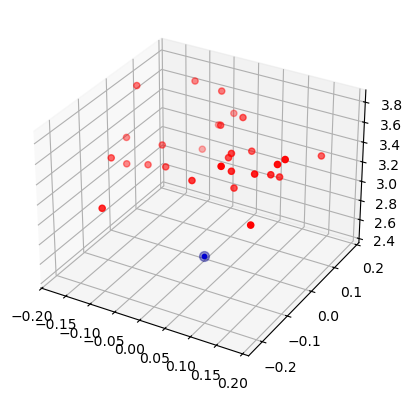

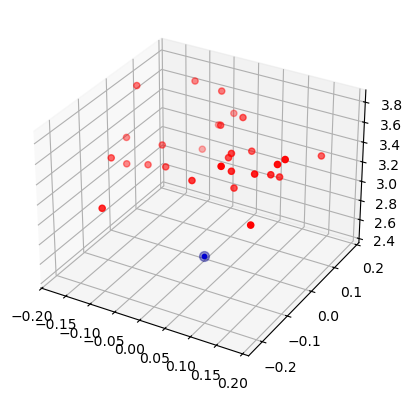

In [3]:
ctr = nest.FindCenterElement(mf)
fig = nest.PlotLayer(ctr, nodesize=10)
nest.PlotTargets(ctr, GrC, fig=fig, mask={
            "ellipsoidal": {
                "major_axis": 1.0,
                "minor_axis": 1.0,
                "polar_axis": 1.5,
                "azimuth_angle": 90,
            }
        }, probability_parameter=0.7 - nest.spatial.distance.x * 0.5 - nest.spatial.distance.y * 0.5,
            tgt_color="red", mask_color="green", probability_cmap="green", src_color = "darkblue")


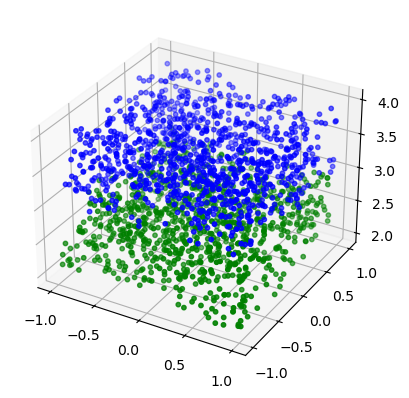

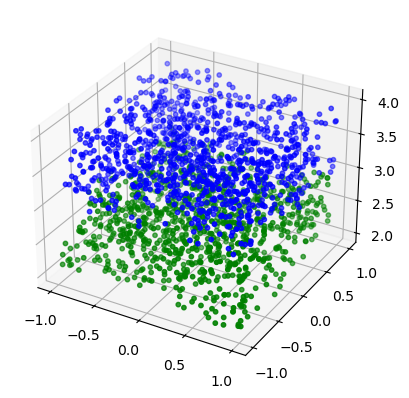

In [4]:
fig = nest.PlotLayer(GrC, nodesize=10)
nest.PlotLayer(mf, fig=fig, nodesize=10, nodecolor="green")

In [5]:
GrC[23].spatial.get("positions")

((-0.059532243305056354, -0.3714575931666173, 3.1956780838676084),)